# Project: Wrangle and Analyse Data

In this project, we will be analysing the data from WeRateDogs, main objective of this project is to Wrangle, Clean and Analyse data retrieved from the twitter handle of WeRateDogs.

## Gathering Data

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import functools
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
twitter_archieved = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archieved.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [7]:
twitter_archieved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Gathering image predictions through url

In [8]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
url_content = r.content
csv_file = open('image-predictions.tsv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [9]:
img_preds = pd.read_csv('image-predictions.tsv', sep='\t')
img_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Gathering tweets information through Twitter API.

As these contain api keys which isn't included in the project submission for security reasons, the code is presented here for review purposes only. 

- consumer_key = ''
- consumer_secret = ''
- access_token = ''
- access_secret = ''

In [ ]:
import credentials as cred

auth = OAuthHandler(cred.consumer_key, cred.consumer_secret)
auth.set_access_token(cred.access_token, cred.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archieved.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as tweet_data_file:
    for tweet_id in tweet_ids:
        try:
            tweet= api.get_status(tweet_id, tweet_mode='extended')
        except tweepy.TweepError:
            pass
        else:
            tweet_data_file.write(json.dumps(tweet._json) + '\n')
            print('Retrieved data for tweet id: {}'.format(tweet_id))
print('Retrieved data for all tweet ids.')

Loading Json text into python

In [13]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [14]:
df_list = []
for json_data in tweets:
    df_list.append({'tweet_id' : json_data['id'],
                    'retweet_count' : int(json_data['retweet_count']),
                    'fav_count' : int(json_data['favorite_count'])})
tweets = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','fav_count'])
tweets.head()

,tweet_id,retweet_count,fav_count
0,892420643555336193,7417,35160
1,892177421306343426,5517,30424
2,891815181378084864,3640,22875
3,891689557279858688,7592,38444
4,891327558926688256,8166,36692


## Assessment

####  Three Data-Frames
- twitter_archieved: a dataframe with tweets about dogs with rating and types.
- im_preds: A dataframe with information about neural network attempting to predict dog breed based on images
- tweets: A dataframe with retweet and favourite tweet count

In [15]:
twitter_archieved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   retweet_count  2331 non-null   int64
 2   fav_count      2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [18]:
twitter_archieved

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
img_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
tweets

,tweet_id,retweet_count,fav_count
0,892420643555336193,7417,35160
1,892177421306343426,5517,30424
2,891815181378084864,3640,22875
3,891689557279858688,7592,38444
4,891327558926688256,8166,36692
...,...,...,...
2326,666049248165822465,38,94
2327,666044226329800704,122,261
2328,666033412701032449,39,107
2329,666029285002620928,41,118


In [21]:
twitter_archieved.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archieved.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archieved.name.value_counts().head(10)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Name: name, dtype: int64

In [24]:
twitter_archieved.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

## Observations

### Quality

#### twitter_archieved, , img_preds, tweets

- twitter_id is of int datatype instead of object, timestamp is of object datatype rather than DateTime.
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, img_num have a lot of missing data or are of no use to our analysis.
- expanded_urls contain urls which don't exist anymore.
- Missing data in name column encoded as the string 'None'
- Name column contains some random names like( None, an, a, one.etc).
- denominator contains value=10 for 2333 results so considering 10 for other conditions as well.
- source column is too long.
- ratings_numerator has a few random values.
- twitter_archived contains retweets.
- Some tweets don't contain useful data.
- Words combined using underscore in p1, p2, and p3.


### Tidiness

#### twitter_archieved , img_preds, tweets

- (twitter_archieved) doggo, floofer, pupper and puppo are different dog types which should be in a same column rather than different.
- (tweets) retweet_counts and fav_count should be with twitter_archieved instead of a separate table.
- (img_preds) Correct predictions and jpg_url should be combined with tweet_data_archived.

## Cleaning

Creating a copy of every dataframe for cleaning

In [61]:
tw_arc_clean = twitter_archieved.copy()
img_preds_clean = img_preds.copy()
tweets_clean = tweets.copy()

### Quality

#### Define

- Dropping tweets which don't contain any relevant information.

#### Code

In [62]:
junk_data_mask = tw_arc_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
tw_arc_clean = tw_arc_clean[~junk_data_mask]
tw_arc_clean.reset_index(drop=True, inplace=True)

#### Test

In [63]:
clean_data_mask = tw_arc_clean.text.str.match('@.*account started.*\d{2}/\d{2}/\d{2}')
clean_data_matches = tw_arc_clean.text.loc[clean_data_mask]
print('Number of rows matching the regex: {}'.format(clean_data_matches.sum()))

Number of rows matching the regex: 0


#### Define

- droping retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp and also removing it's remaining rows.

#### Code

In [65]:
retweeted_cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
retweeted_mask = tw_arc_clean.retweeted_status_id.notnull()

tw_arc_clean = tw_arc_clean[~retweeted_mask]
tw_arc_clean_rt_test = tw_arc_clean.copy() # For testing
tw_arc_clean.drop(columns=retweeted_cols, inplace=True)
tw_arc_clean.reset_index(drop=True, inplace=True)

#### Test

In [66]:
tw_arc_clean_rt_test.retweeted_status_id.notnull().sum()

0

In [67]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2174 entries, 0 to 2173
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2174 non-null   int64  
 1   in_reply_to_status_id  77 non-null     float64
 2   in_reply_to_user_id    77 non-null     float64
 3   timestamp              2174 non-null   object 
 4   source                 2174 non-null   object 
 5   text                   2174 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2174 non-null   int64  
 8   rating_denominator     2174 non-null   int64  
 9   name                   2174 non-null   object 
 10  doggo                  2174 non-null   object 
 11  floofer                2174 non-null   object 
 12  pupper                 2174 non-null   object 
 13  puppo                  2174 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 237.9+ 

#### Define

- Dropping columns which are unrequired and contain missing data on large scale (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, expanded_urls, retweeted_status_timestamp)

#### Code

In [68]:
columns = ['in_reply_to_status_id','in_reply_to_user_id','expanded_urls']
tw_arc_clean.drop(columns,axis=1,inplace=True)

In [69]:
columns= ['jpg_url','img_num']
img_preds_clean.drop(columns, axis=1, inplace=True)

#### Test

In [70]:
tw_arc_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None


In [71]:
img_preds_clean.head(3)

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### Define

- Convert datatypes of all tweet_id of all tables to object datatype.
- Changing datatype of timestamp.

#### Code

In [35]:
tw_arc_clean.tweet_id = tw_arc_clean.tweet_id.astype(object)
img_preds_clean.tweet_id = img_preds_clean.tweet_id.astype(object)
tweets_clean.tweet_id = tweets_clean.tweet_id.astype(object)

In [36]:
tw_arc_clean.timestamp = pd.to_datetime(tw_arc_clean.timestamp).dt.tz_localize(None)

#### Test

In [37]:
tw_arc_clean.info(), img_preds_clean.info(), tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2355 non-null   object        
 1   timestamp           2355 non-null   datetime64[ns]
 2   source              2355 non-null   object        
 3   text                2355 non-null   object        
 4   rating_numerator    2355 non-null   int64         
 5   rating_denominator  2355 non-null   int64         
 6   name                2355 non-null   object        
 7   doggo               2355 non-null   object        
 8   floofer             2355 non-null   object        
 9   pupper              2355 non-null   object        
 10  puppo               2355 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 

(None, None, None)

In [38]:
tw_arc_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2350   2015-11-16 00:24:50
2351   2015-11-16 00:04:52
2352   2015-11-15 23:21:54
2353   2015-11-15 23:05:30
2354   2015-11-15 22:32:08
Name: timestamp, Length: 2355, dtype: datetime64[ns]

#### Define

- Replacing names which contain 'None'.

#### Code

In [78]:
tw_arc_clean.name = tw_arc_clean.name.replace('None', np.nan)

#### Test

In [81]:
tw_arc_clean.name.loc[tw_arc_clean.name == 'None'].sum()

0

#### Define

- Denominator contains value=10 for 2333 results so considering 10 for other conditions as well.

#### Code

In [39]:
tw_arc_clean.rating_denominator = 10

#### Test

In [40]:
tw_arc_clean.rating_denominator.value_counts()

10    2355
Name: rating_denominator, dtype: int64

In [41]:
tw_arc_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define

- Modifying source column and replacing source url to it's type.

#### Code

In [42]:
tw_arc_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [133]:
tw_arc_clean['source'] = tw_arc_clean['source'].replace(to_replace=['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'] ,
                               value=['Twitter for iPhone','Twitter Web Client','Vine - Make a Scene','TweetDeck'])

#### Test

In [134]:
tw_arc_clean.source.value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define

- Replace the underscore separating the words in each of the p* columns in img_pred.

#### Code

In [83]:
# Remove underscores p* columns of tweet_image_pred
p_cols = [p_col for p_col in img_preds_clean.columns.tolist() if
          'p' in p_col and '_' not in p_col]
for p_col in p_cols:
    img_preds_clean[p_col] = img_preds_clean[p_col].str.replace('_', ' ')

#### Test

In [84]:
img_preds_clean[p_cols].head(5)

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


### Tidiness

#### Define

- doggo, floofer, pupper and puppo are different dog types which should be in a same column rather than different.

#### Code

In [88]:
tw_arc_clean_dog = tw_arc_clean.copy()

In [92]:
tw_arc_clean_dog.loc[(tw_arc_clean_dog[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
165,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,NaN,doggo,None,None,puppo
172,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,NaN,doggo,floofer,None,None
381,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,Dido,doggo,None,pupper,None
441,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,NaN,doggo,None,pupper,None
466,802265048156610565,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",11,10,NaN,doggo,None,pupper,None
473,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,Bones,doggo,None,pupper,None
566,785639753186217984,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,doggo,None,pupper,None
592,781308096455073793,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,NaN,doggo,None,pupper,None
721,759793422261743616,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,doggo,None,pupper,None
780,751583847268179968,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,NaN,doggo,None,pupper,None


In [93]:
tw_arc_clean_dog.doggo.replace('None', '', inplace=True)
tw_arc_clean_dog.floofer.replace('None', '', inplace=True)
tw_arc_clean_dog.pupper.replace('None', '', inplace=True)
tw_arc_clean_dog.puppo.replace('None', '', inplace=True)

In [94]:
tw_arc_clean_dog['stage'] = tw_arc_clean_dog.doggo + tw_arc_clean_dog.floofer + tw_arc_clean_dog.pupper + tw_arc_clean_dog.puppo
tw_arc_clean_dog.loc[tw_arc_clean_dog.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
tw_arc_clean_dog.loc[tw_arc_clean_dog.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
tw_arc_clean_dog.loc[tw_arc_clean_dog.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [107]:
tw_arc_clean = tw_arc_clean_dog
column = ['doggo','floofer','pupper','puppo']
tw_arc_clean.drop(column,axis=1 ,inplace=True)

#### Test

In [108]:
tw_arc_clean.stage.value_counts()

                 1830
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [109]:
tw_arc_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,


#### Define

- retweet_counts and fav_count should be with twitter_archieved instead of a separate table based on tweet_id.

#### Code

In [110]:
tw_arc_tweets_clean = pd.merge(tw_arc_clean, tweets_clean, on='tweet_id',how='left')

#### Test

In [111]:
tw_arc_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2174 non-null   int64  
 1   timestamp           2174 non-null   object 
 2   source              2174 non-null   object 
 3   text                2174 non-null   object 
 4   rating_numerator    2174 non-null   int64  
 5   rating_denominator  2174 non-null   int64  
 6   name                1391 non-null   object 
 7   stage               2174 non-null   object 
 8   retweet_count       2167 non-null   float64
 9   fav_count           2167 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 186.8+ KB


In [112]:
tw_arc_tweets_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,fav_count
1066,711694788429553666,2016-03-20 23:23:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh. My. God. 13/10 magical af https://t.co/Ezu...,13,10,NaN,,17590.0,31630.0
1491,682393905736888321,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,11,10,Kreg,,637.0,2161.0
1806,672884426393653248,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,6,10,NaN,,782.0,1440.0
2067,667873844930215936,2015-11-21 01:15:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Neat dog. Lots of spikes. Always in push-up po...,10,10,NaN,,372.0,580.0
1389,687807801670897665,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,11,10,Trooper,,687.0,2303.0


In [113]:
tw_arc_clean = tw_arc_tweets_clean

#### Define

Merge img_preds_clean with tw_arc_clean to get an all round view of our data set.

#### Code

In [124]:
tw_arc_clean = pd.merge(tw_arc_clean, img_preds_clean, on='tweet_id', how='left')

#### Test

In [125]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2174 non-null   int64  
 1   timestamp           2174 non-null   object 
 2   source              2174 non-null   object 
 3   text                2174 non-null   object 
 4   rating_numerator    2174 non-null   int64  
 5   rating_denominator  2174 non-null   int64  
 6   name                1391 non-null   object 
 7   stage               2174 non-null   object 
 8   retweet_count       2167 non-null   float64
 9   fav_count           2167 non-null   float64
 10  p1                  1994 non-null   object 
 11  p1_conf             1994 non-null   float64
 12  p1_dog              1994 non-null   object 
 13  p2                  1994 non-null   object 
 14  p2_conf             1994 non-null   float64
 15  p2_dog              1994 non-null   object 
 16  p3    

## Saving Master Data-Frames

In [135]:
tw_arc_clean.to_csv('twitter_archive_master.csv', index=False)

In [136]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,fav_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7417.0,35160.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5517.0,30424.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Visualising

#### Retweets Count vs Favourite Tweet  Count

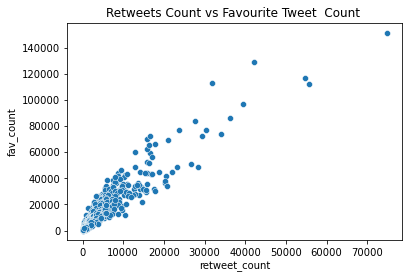

In [137]:
sns.scatterplot(x=df['retweet_count'],y=df['fav_count'])
plt.title('Retweets Count vs Favourite Tweet  Count ');

#### Tweet Source Comparison

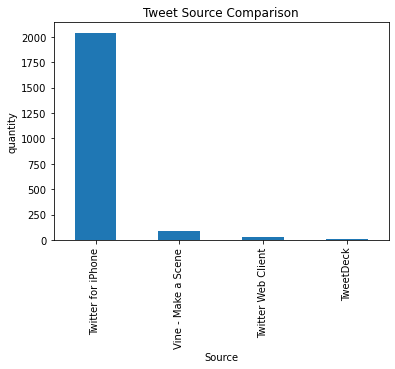

In [138]:
df['source'].value_counts().plot(kind='bar')
plt.title('Tweet Source Comparison');
plt.xlabel('Source');
plt.ylabel('quantity');

#### Most Popular Dog Breeds

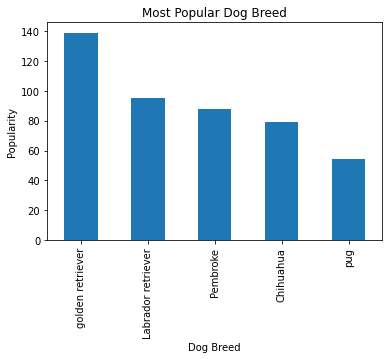

In [140]:
df['p1'].value_counts().head(5).plot(kind='bar')
plt.title('Most Popular Dog Breed');
plt.xlabel('Dog Breed');
plt.ylabel('Popularity');

#### Most Common Dog Stage

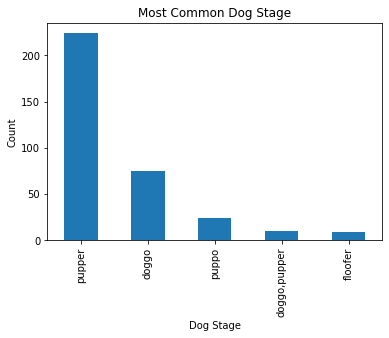

In [141]:
df['stage'].value_counts().head(5).plot(kind='bar')
plt.title('Most Common Dog Stage');
plt.xlabel('Dog Stage');
plt.ylabel('Count');